# Data Challenge #1 - Data Analytics

## Grupo 32

**Integrantes:**

- Cristiane Aline Fischer
- Pedro Baldini
- Vinícius Prado Lima
- Vitor Sarilio

## Desafio

**Contexto**
- Empresa que exporta vinhos do Brasil para o mundo
- Área de analytics recém-criada, responsável por relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas
- Explicar a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises
- Construir gráficos que passem a ideia central para que os investidores sigam com as ações
- Utilizar outros dados da vinícola, além de dados externos

**Objetivo:** <br>

Dizer o montante de venda de exportação *nos últimos 15 anos* (período: 2008-2022), separando a *análise por país* e trazendo quais as *prospecções futuras* e possíveis *ações para uma melhoria nas exportações*.

O head de dados pediu que você construísse uma tabela contendo:
- `País de origem` ('Brasil')
- `País de destino` do vinho
- `Quantidade em litros` de vinho exportado (1kg = 1L)
- `Valor em US$` de vinho exportado

**Fonte dos dados da vinícola:** [**Vitibrasil - Embrapa**](http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01)

O relatório sobre exportação está disponível para ser lido através do link: ...

# Bibliotecas

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from pprint import pprint

# import functions.py
from utils.functions import *

import warnings

# O módulo bcb.currency obtem dados de moedas do conversor de moedas 
# do Banco Central através de webscraping -  https://wilsonfreitas.github.io/python-bcb/
from bcb import currency

warnings.filterwarnings("ignore")

In [2]:
# importar estilos para os gráficos do projeto
plt.style.use('./utils/wine_style.mplstyle')

# Coleta & Limpeza de Dados

In [3]:
# llistar todas os arquivos do diretório dados_embrapa
embrapa_path = 'dados_embrapa/' # caminho relativo
embrapa_files = os.listdir(embrapa_path)

pprint(embrapa_files)

['ExpEspumante.csv',
 'ExpUva.csv',
 'ExpVinho.csv',
 'Producao.csv',
 'ExpSuco.csv']


Importar os datasets a atribuí-los às variáveis, lembrando que o foco principal são os dados de exportação de vinhos.

In [4]:
# dados de exportação
vinho_exp_df = pd.read_csv(embrapa_path + 'ExpVinho.csv', sep=';', index_col=0)
espumante_exp_df = pd.read_csv(embrapa_path + 'ExpEspumante.csv', sep=';', index_col=0)
suco_exp_df = pd.read_csv(embrapa_path + 'ExpSuco.csv', sep=';', index_col=0)
uva_exp_df = pd.read_csv(embrapa_path + 'ExpUva.csv', sep=';', index_col=0)

exp_dfs = [espumante_exp_df, suco_exp_df, uva_exp_df, vinho_exp_df]

vinho_exp_df.head()

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
Id,,,,,,,,,,,,,,,,,,,,,
1,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
2,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
4,Angola,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
5,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
for df in exp_dfs:
    print(f'shape: {df.shape}')

shape: (101, 107)
shape: (121, 107)
shape: (127, 107)
shape: (128, 107)


Pelas dimensões dos dataframes, temos a mesma quantidade de cabeçalhos, 107, e as linhas que variam entre 101 e 128.

In [6]:
# dados de produção
producao = pd.read_csv(embrapa_path + 'Producao.csv', sep=';', index_col=0)

producao.shape

(51, 54)

In [7]:
producao.head(10)

,produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
id,,,,,,,,,,,,,,,,,,,,,
1,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,200053669,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
2,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,162917363,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
3,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,5079748,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
4,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,32056558,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
5,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,36750933,...,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796
6,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,16131758,15000671,...,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918
7,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,20409231,17640081,...,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613
8,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,4723982,4110181,...,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265
9,SUCO,1097771,2296654,3509440,0,0,0,0,0,0,...,64879790,76723537,87894468,42210389,77161971,65467906,77805352,69261287,100932264,65809079


O dataset de produção tem metade da quantidade de colunas dos demais (54). Isso porque, nos primeiros que importamos os cabeçalhos se dividem entre `ano` e `ano.1`. O motivo para isso é que temos 2 informações para o mesmo ano (valor em dólar e em litros, respectivamente). Para o dataset de produção, temos apenas a informação da quantidade produzida em litros, ou seja, a venda ainda não aconteceu.

Vamos iniciar a limpeza por ele, já que tem padrão diferente dos demais.

In [8]:
# check columns names
pprint([col for col in vinho_exp_df.columns[0:5]])

pprint([col for col in producao.columns[0:5]])

['País', '1970', '1970.1', '1971', '1971.1']
['produto', '1970', '1971', '1972', '1973']


In [9]:
producao = producao.set_index('produto')
# get only last 15 years
producao = producao[producao.columns[-15:]]
# get only upper case rows from index
producao = producao[producao.index.str.isupper()].copy()
# to lower case
producao.index = producao.index.str.lower()

producao.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
produto,,,,,,,,,,,,,,,
vinho de mesa,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
vinho fino de mesa (vinífera),47334501,39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796
suco,35647994,39715098,50125944,69364324,70066732,64879790,76723537,87894468,42210389,77161971,65467906,77805352,69261287,100932264,65809079
derivados,59622293,56787892,51210756,85748723,100757101,64072127,62907281,107349704,53950314,109116761,95202101,142888747,92533804,169031493,138501226


A limpeza consome a maior parte de tempo operacional da rotina de dados, no entanto a pesquisa ocupa a outra maior parcela. As funções localizadas em `utils\functions.py` foram criadas para facilitar a rotina e manutenção dos dados. Cada função está comentada com o objetivo e parâmetros de entrada e saída, bem como um exemplo de uso.

**Padronizando nomes de países**: função `replace_country_names`

- verificamos erros ortográficos, como falta de acentuação
- padronizamos países com mais de um nome possível (ex.: EUA, Estados Unidos, Estados Unidos da América)
- pesquisamos e atualizamos países que, ao longo dos anos, se dissolveram ou trocaram de nome (ex.: Iugoslávia se dissolveu entre 1991 e 1992, Suazilândia mudou de nome para Essuatini em 2008)
- removemos a informação informações mal posicionadas (ex.: 'Provisão de Aeronaves' não é país)

In [10]:
# verificar a quantidade de países em cada dataframe
for df in exp_dfs:
    print(f'Países únicos: {df.shape[0]}')

# concatenar todos os países em uma lista sem duplicidade
country_list = []
for df in exp_dfs:
    country_list.append(df['País'].unique())
# unique countries
unique_countries = np.unique(np.concatenate(country_list))

# print
print(unique_countries)

Países únicos: 101
Países únicos: 121
Países únicos: 127
Países únicos: 128
['Afeganistão' 'Africa do Sul' 'Alemanha'
 'Alemanha, República Democrática' 'Alemanha, República Democrática da'
 'Angola' 'Anguilla' 'Antigua e Barbuda' 'Antilhas Holandesas'
 'Antígua e Barbuda' 'Arabia Saudita' 'Argentina' 'Argélia' 'Aruba'
 'Arábia Saudita' 'Australia' 'Austrália' 'Bahamas' 'Bahrein' 'Bangladesh'
 'Barbados' 'Barein' 'Belgica' 'Belice' 'Belize' 'Benin' 'Bermudas'
 'Birmânia' 'Bolívia' 'Bosnia' 'Brasil' 'Bulgaria' 'Bulgária'
 'Burquina Faso' 'Bélgica' 'Bósnia-Herzegovina' 'Cabo Verde' 'Camarões'
 'Camores' 'Canada' 'Canadá' 'Catar' 'Cayman, Ilhas' 'Chile' 'China'
 'Chipre' 'Cingapura' 'Cocos (Keeling), Ilhas' 'Colombia' 'Colômbia'
 'Comores' 'Congo' 'Coreia do Norte' 'Coreia do Sul'
 'Coreia do Sul, Republica da' 'Coreia, Republica Sul' 'Costa Rica'
 'Costa do Marfim' 'Coveite' 'Croácia' 'Cuba' 'Curaçao' 'Dinamarca'
 'Djibuti' 'Dominica' 'Dominica, Ilha de' 'Egito' 'El Salvador'
 'Emirados 

In [11]:
# aplicar funções aos dataframes de exportação
for df in exp_dfs:
    df = normalize_index(df) # usar 'id'
    df = pais_to_country(df) # usar 'country'
    df = correct_column_names(df) # ccorrigir nomes das colunas
    df = replace_country_names(df) # mapear nomes de países a partir de um dicionário

# filtrar últimos 15 anos
espumante_exp_df = filter_years(espumante_exp_df, 15)
suco_exp_df = filter_years(suco_exp_df, 15)
uva_exp_df = filter_years(uva_exp_df, 15)
vinho_exp_df = filter_years(vinho_exp_df, 15)

In [12]:
# verificar países únicos no dataframe de exportação de espumantes
espumante_exp_df.index.unique()

Index(['Alemanha', 'Angola', 'Antilhas Holandesas', 'Antígua e Barbuda',
       'Argentina', 'Aruba', 'Austrália', 'Bahamas', 'Bangladesh', 'Barbados',
       'Benin', 'Bermudas', 'Bolívia', 'Bulgária', 'Bélgica',
       'Bósnia-Herzegovina', 'Cabo Verde', 'Camarões', 'Canada', 'Catar',
       'Cayman, Ilhas', 'Chile', 'China', 'Chipre', 'Colômbia',
       'Coreia do Sul', 'Costa Rica', 'Cuba', 'Curaçao', 'Dinamarca',
       'Dominica, Ilha de', 'Dominicana, República', 'El Salvador',
       'Emirados Árabes Unidos', 'Equador', 'Espanha',
       'Estados Unidos da América', 'Estônia', 'Filipinas', 'Finlândia',
       'França', 'Gana', 'Gibraltar', 'Granada', 'Grécia', 'Guatemala',
       'Guiana', 'Guiné Equatorial', 'Guiné-Bissau', 'Haiti', 'Holanda',
       'Honduras', 'Hong Kong', 'Hungria', 'Iraque', 'Irlanda', 'Islândia',
       'Itália', 'Japão', 'Jordânia', 'Letônia', 'Libéria', 'Luxemburgo',
       'Líbano', 'Maldivas, Ilhas', 'Malta', 'Malvinas, Ilhas', 'Man, Ilha',
       'Ma

In [13]:
# checar valores vazios (NaN)
for df in exp_dfs:
    print(df.isna().sum().sum())

0
0
0
0


# Planilha de exportação - Entrega #1

Antes de agrupar, multiplicar e visualizar, vamos ficar na nossa primeira solicitação, construir uma tabela contendo:
- `País de origem` ('Brasil')
- `País de destino` do vinho
- `Quantidade em litros` de vinho exportado (1kg = 1L)
- `Valor em US$` de vinho exportado

In [14]:
# localizar 'dolar' no nome das colunas
vinho_dolars_sum = vinho_exp_df.T.query('index.str.contains("dolars")', engine='python').T.copy()
vinho_dolars_sum = pd.DataFrame(vinho_dolars_sum.sum(axis=1))
vinho_dolars_sum.columns = ['dolars']
vinho_dolars_sum = vinho_dolars_sum.sort_values(by='dolars', ascending=False)

vinho_dolars_sum.head()

,dolars
country,
Paraguai,38719031
Rússia,25504484
Estados Unidos da América,9684567
China,4746525
Reino Unido,4711464


In [15]:
# localizar 'quantity' no nome das colunas
vinho_qty_sum = vinho_exp_df.T.query('index.str.contains("quantity")', engine='python').T.copy()
vinho_qty_sum = pd.DataFrame(vinho_qty_sum.sum(axis=1))
vinho_qty_sum.columns = ['quantity']
vinho_qty_sum = vinho_qty_sum.sort_values(by='quantity', ascending=False)

vinho_qty_sum.head()

,quantity
country,
Rússia,39029799
Paraguai,29214770
Estados Unidos da América,3563355
China,2509458
Espanha,1993000


Os países com zero em quantidade (L) e valor (US$) são dispensáveis nessa base, já que são países que provavelmente compraram vinho em outro período de tempo. Para não ocupar espaço na memória e nem plotá-los nos gráficos, vamos removê-los.

In [16]:
# lidar com zeros
zero_qty = vinho_qty_sum.query('quantity == 0')
zero_dolars = vinho_dolars_sum.query('dolars == 0')

# verificar países com 0 em quantidade e em dólares
zero_qty_countries = zero_qty.index
zero_dolars_countries = zero_dolars.index
# intersect both lists
zero_countries = np.intersect1d(zero_qty_countries, zero_dolars_countries)

#  dropar países com 0 em ambos os casos
vinho_qty_sum = vinho_qty_sum.drop(zero_countries)
vinho_dolars_sum = vinho_dolars_sum.drop(zero_countries)
vinho_exp_df = vinho_exp_df.drop(zero_countries)

print(vinho_qty_sum.query('quantity == 0').shape,
        vinho_dolars_sum.query('dolars == 0').shape,
        zero_countries[0:1],
        vinho_exp_df.query('country == "Anguilla"').shape)

(0, 1) (0, 1) ['Anguilla'] (0, 30)


In [17]:
# mesclar tabelas
output_exportacao_vinhos = pd.merge(vinho_dolars_sum, vinho_qty_sum, left_index=True, right_index=True)
# ordenar primeiro pelo valor e depois pela quantidade,
# assim as exportações de maior valor ficam no topo
output_exportacao_vinhos = output_exportacao_vinhos.sort_values(by=['dolars', 'quantity'], ascending=False)
output_exportacao_vinhos = output_exportacao_vinhos.reset_index()
output_exportacao_vinhos.columns = ['País de Destino', 'Valor em US$', 'Quantidade em Litros']
output_exportacao_vinhos['País de Origem'] = 'Brasil'
output_exportacao_vinhos = output_exportacao_vinhos[['País de Origem', 'País de Destino', 'Valor em US$', 'Quantidade em Litros']]

output_exportacao_vinhos.head()

,País de Origem,País de Destino,Valor em US$,Quantidade em Litros
0,Brasil,Paraguai,38719031,29214770
1,Brasil,Rússia,25504484,39029799
2,Brasil,Estados Unidos da América,9684567,3563355
3,Brasil,China,4746525,2509458
4,Brasil,Reino Unido,4711464,1239551


In [18]:
# exportar em xlsx, salvar em outputs
output_exportacao_vinhos.to_excel('outputs/exportacao_vinhos.xlsx', index=False)

# exportar em csv
output_exportacao_vinhos.to_csv('outputs/exportacao_vinhos.csv', index=False)

# Exploratory Data Anaysis (EDA) - Embrapa

Vamos iniciar a exploração dos dados de `exportação de vinho` separando os dados por unidade de medida, `quantidade (L)` e `valor (US$)`. Primeiro, ranqueamos os países que mais importaram vinho da Vinícola 32.

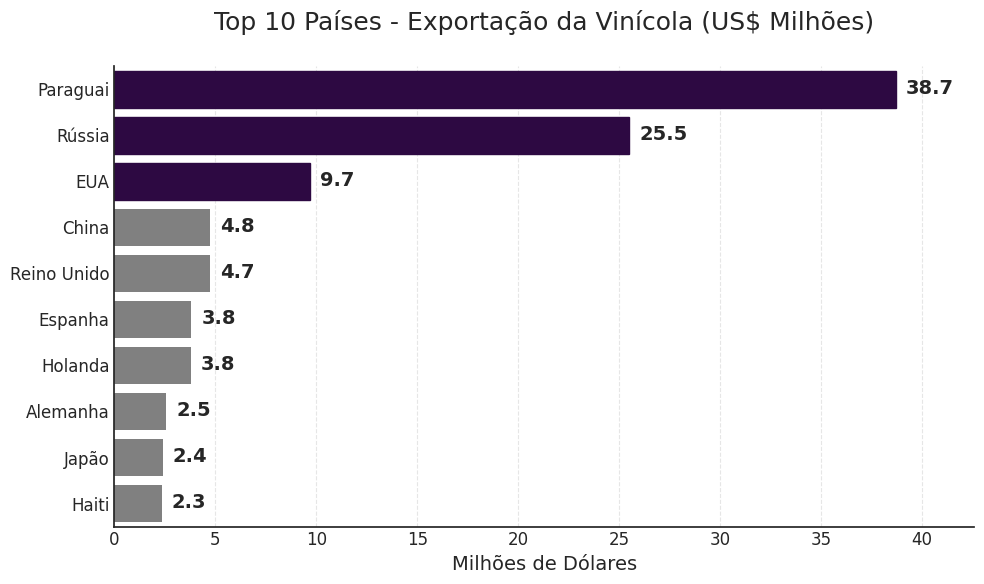

In [19]:
# filtrar os dados de dólar
top_vinho_dolars_sum = vinho_dolars_sum.head(10).reset_index().copy()
top_vinho_dolars_sum.columns = ['country', 'dolars']
# converter para milhões de dólares
top_vinho_dolars_sum['dolars'] = (top_vinho_dolars_sum['dolars'] / 1e6).round(2)
top_vinho_dolars_sum.country = top_vinho_dolars_sum.country.map(lambda x: 'EUA' if x == 'Estados Unidos da América' else x)

# plotar gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=top_vinho_dolars_sum, x='dolars', y='country', orient='h', color='gray', ax=ax)
for i in range(3):
    ax.patches[i].set_color('#2D0942')
ax.set_title('Top 10 Países - Exportação da Vinícola (US$ Milhões)\n', fontsize=18)
ax.set_xlim(0, top_vinho_dolars_sum['dolars'].max() * 1.1)
ax.set_xlabel('US$ (Milhões)')
# texto para cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', (p.get_width() + 0.5, p.get_y() + 0.5), fontweight='bold', fontsize=14)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Milhões de Dólares', fontsize=14)
ax.set_ylabel('')
plt.tight_layout()
# caso deseje salvar a figura, descomente a linha abaixo
#plt.savefig('./outputs/top_10_vinho_dolar_sum.png', dpi=300)
plt.show()

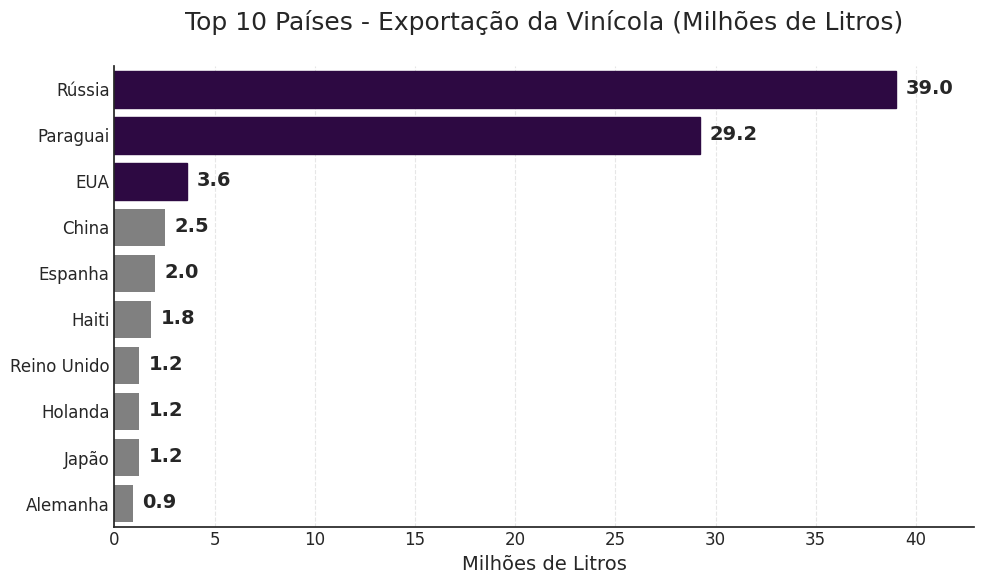

In [20]:
# filtrar dados de litro
top_vinho_qty_sum = vinho_qty_sum.head(10).reset_index().copy()
top_vinho_qty_sum.columns = ['country', 'quantity']
top_vinho_qty_sum.country = top_vinho_qty_sum.country.map(lambda x: 'EUA' if x == 'Estados Unidos da América' else x)
# milhões de litros
top_vinho_qty_sum['quantity'] = (top_vinho_qty_sum['quantity'] / 1e6).round(1)

# plotar
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=top_vinho_qty_sum, x='quantity', y='country', orient='h', color='gray', ax=ax)
for i in range(3):
    ax.patches[i].set_color('#2D0942')
ax.set_title('Top 10 Países - Exportação da Vinícola (Milhões de Litros)\n', fontsize=18)
ax.set_xlim(0, top_vinho_qty_sum['quantity'].max() * 1.1)
ax.set_xlabel('Milhões de Litros')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', (p.get_width() + 0.5, p.get_y() + 0.5), fontweight='bold', fontsize=14)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Milhões de Litros', fontsize=14)
ax.set_ylabel('')
plt.tight_layout()
# caso deseje salvar a figura, descomente a linha abaixo
#plt.savefig('./outputs/top_10_vinho_qty_sum.png', dpi=300)
plt.show()

Agora que tivemos contato com os gráficos, vamos imprimir alguns dados gerais:

In [21]:
# representatividade da Rússia + Paraguai + Estados Unidos da América sobre o total exportado (valor e quantidade)
# total exportado
total_vinho_dolars = vinho_dolars_sum['dolars'].sum()
total_vinho_qty = vinho_qty_sum['quantity'].sum()

# representatividade
russia_dolars = vinho_dolars_sum.query('country == "Rússia"')['dolars'].values[0]
russia_qty = vinho_qty_sum.query('country == "Rússia"')['quantity'].values[0]

paraguai_dolars = vinho_dolars_sum.query('country == "Paraguai"')['dolars'].values[0]
paraguai_qty = vinho_qty_sum.query('country == "Paraguai"')['quantity'].values[0]

eua_dolars = vinho_dolars_sum.query('country == "Estados Unidos da América"')['dolars'].values[0]
eua_qty = vinho_qty_sum.query('country == "Estados Unidos da América"')['quantity'].values[0]

# representatividade
russia_dolars_pct = ((russia_dolars / total_vinho_dolars) * 100).round(1)
russia_qty_pct = ((russia_qty / total_vinho_qty) * 100).round(1)

paraguai_dolars_pct = ((paraguai_dolars / total_vinho_dolars) * 100).round(1)
paraguai_qty_pct = ((paraguai_qty / total_vinho_qty) * 100).round(1)

eua_dolars_pct = ((eua_dolars / total_vinho_dolars) * 100).round(1)
eua_qty_pct = ((eua_qty / total_vinho_qty) * 100).round(1)

# sum Rússia, Paraguai e EUA
russia_paraguai_eua_dolars = russia_dolars + paraguai_dolars + eua_dolars
russia_paraguai_eua_qty = russia_qty + paraguai_qty + eua_qty

# representatividade
russia_paraguai_eua_dolars_pct = ((russia_paraguai_eua_dolars / total_vinho_dolars) * 100).round(1)
russia_paraguai_eua_qty_pct = ((russia_paraguai_eua_qty / total_vinho_qty) * 100).round(1)

print(f'Valor total exportado: US$ {total_vinho_dolars:.2f} milhões')
print(f'Quantidade total exportada: {total_vinho_qty:.2f} milhões de litros')
print(f'\nRússia: {russia_dolars_pct}% (US$ {russia_dolars:.2f} milhões) - {russia_qty_pct}% ({russia_qty:.2f} milhões de litros)')
print(f'Paraguai: {paraguai_dolars_pct}% (US$ {paraguai_dolars:.2f} milhões) - {paraguai_qty_pct}% ({paraguai_qty:.2f} milhões de litros)')
print(f'EUA: {eua_dolars_pct}% (US$ {eua_dolars:.2f} milhões) - {eua_qty_pct}% ({eua_qty:.2f} milhões de litros)')
print(f'\nRússia + Paraguai + EUA: {russia_paraguai_eua_dolars_pct}% (US$ {russia_paraguai_eua_dolars:.2f} milhões) - {russia_paraguai_eua_qty_pct}% ({russia_paraguai_eua_qty:.2f} milhões de litros)')

Valor total exportado: US$ 112644316.00 milhões
Quantidade total exportada: 87982432.00 milhões de litros

Rússia: 22.6% (US$ 25504484.00 milhões) - 44.4% (39029799.00 milhões de litros)
Paraguai: 34.4% (US$ 38719031.00 milhões) - 33.2% (29214770.00 milhões de litros)
EUA: 8.6% (US$ 9684567.00 milhões) - 4.1% (3563355.00 milhões de litros)

Rússia + Paraguai + EUA: 65.6% (US$ 73908082.00 milhões) - 81.6% (71807924.00 milhões de litros)


Ao plotar as variáveis juntas, podemos visualizar uma correlação positiva entre valor e quantidade. Para compreender melhor, seria importante abrir os dados de compra e, com amostragens, verificar a linearidade.

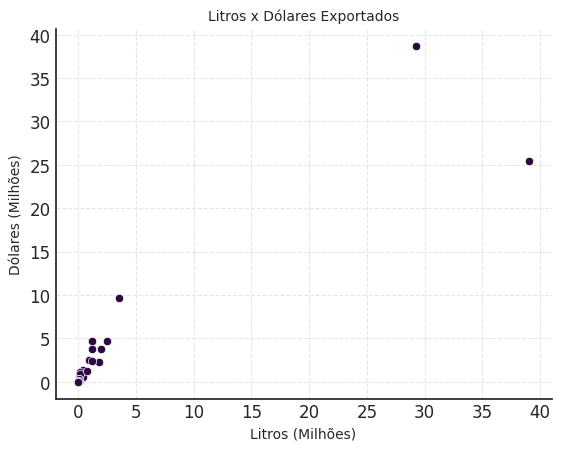

In [22]:
# mesclar tabelas de quantidade e dólares
vinho_dolar_quantity_sum = pd.merge(vinho_qty_sum, vinho_dolars_sum, left_index=True, right_index=True)
# em milhões
vinho_dolar_quantity_sum = (vinho_dolar_quantity_sum / 1e6).round(2)

# scatterplot
sns.scatterplot(data=vinho_dolar_quantity_sum, x='quantity', y='dolars')
# formatar tickers
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Litros x Dólares Exportados')
plt.xlabel('Litros (Milhões)')
plt.ylabel('Dólares (Milhões)')
plt.show()

Observamos que Paraguai e Rússia, juntos, fizeram as maiores importações de vinho da vinícola no período dos 15 anos estudados.

In [23]:
# vamos isolar os países para preparar um gráfico de barras empilhadas
vinho_paraguai = pd.DataFrame(vinho_exp_df.loc['Paraguai'].copy())
vinho_paraguai = vinho_paraguai[vinho_paraguai.index.str.contains('dolars')]

vinho_russia = pd.DataFrame(vinho_exp_df.loc['Rússia'].copy())
vinho_russia = vinho_russia[vinho_russia.index.str.contains('dolars')]

# others = todos menos Rússia e Paraguai
vinho_outros_paises = vinho_exp_df.copy()
vinho_outros_paises = vinho_outros_paises.drop(['Rússia', 'Paraguai'])
vinho_outros_paises = pd.DataFrame(vinho_outros_paises.T.sum(axis=1))
vinho_outros_paises.columns = ['Outros']
vinho_outros_paises = vinho_outros_paises[vinho_outros_paises.index.str.contains('dolars')]

# funções documentadas no arquivo functions.py
vinho_paraguai = drop_dolars(vinho_paraguai)
vinho_russia = drop_dolars(vinho_russia)
vinho_outros_paises = drop_dolars(vinho_outros_paises)

In [24]:
# concatenar dataframes
vinho_total_sum = pd.concat([vinho_paraguai, vinho_russia, vinho_outros_paises], axis=1)
vinho_total_sum = vinho_total_sum.sort_index()
vinho_total_sum = vinho_total_sum.T

# somar todos os anos em uma única coluna
vinho_total_sum = pd.DataFrame(vinho_total_sum.sum(axis=1))
vinho_total_sum = vinho_total_sum.sort_values(by=0, ascending=False)
vinho_total_sum.columns = ['Valor']

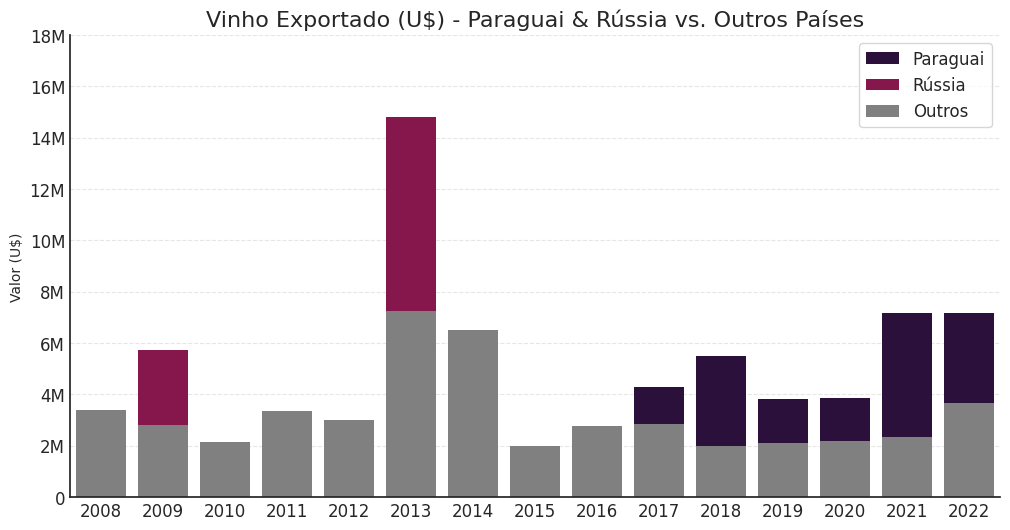

In [25]:
# plot stacked bar chart with seaborn
fig, ax = plt.subplots(figsize=(12, 6))
# area stacked plot
sns.barplot(x=vinho_paraguai.index, y=vinho_paraguai['Paraguai'], label='Paraguai', ax=ax)
sns.barplot(x=vinho_russia.index, y=vinho_russia['Rússia'], label='Rússia', ax=ax)
sns.barplot(x=vinho_outros_paises.index, y=vinho_outros_paises['Outros'], color='gray', label='Outros', ax=ax)
plt.title('Vinho Exportado (U$) - Paraguai & Rússia vs. Outros Países', fontsize=16)
# format y ticks from 0 to 18 M, 2 M by 2 M
plt.yticks(np.arange(0, 20000000, 2000000), ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M', '18M'])
plt.xlabel('')
plt.ylabel('Valor (U$)')
plt.legend(loc='upper left')
plt.legend()
plt.show()

# Paraguai é um país importador em potencial

In [26]:
# valor de exportação da Rússia em 2013 -> próximos passos: verificar compras individuais
vinho_russia_2013 = vinho_exp_df.query('country == "Rússia"').T.copy()
# filter 2013_
vinho_russia_2013 = vinho_russia_2013[vinho_russia_2013.index.str.contains('2013_')]
# drop columns with 0
vinho_russia_2013

country,Rússia
2013_quantity,5893291
2013_dolars,14795694


In [27]:
# calcular share do Paraguai, Rússia e Outros
vinho_total_sum['Share'] = (vinho_total_sum['Valor'] / vinho_total_sum['Valor'].sum() * 100).round(1)

# talela com share
vinho_total_sum = vinho_total_sum.reset_index()
vinho_total_sum.columns = ['País', 'Valor (US$)', 'Share (%)']
vinho_total_sum = vinho_total_sum.set_index('País')

# exportar para excel e csv
#vinho_total_sum.to_excel('outputs/exportacao_vinho-share_paraguai_russia_outros.xlsx')
#vinho_total_sum.to_csv('outputs/exportacao_vinho-share_paraguai_russia_outros.csv')

vinho_total_sum.head()

,Valor (US$),Share (%)
País,,
Outros,48420801,43.0
Paraguai,38719031,34.4
Rússia,25504484,22.6


Agora, vamos ter uma ideia sobre a rentabilidade das exportações através da criação de um KPI (Key Performance Indicator): a taxa de **dólar por litro** ($u$):

$$u = \frac{valor}{quantidade}$$

In [28]:
# KPI de dólar por litro com functions.py
vinho_exp_value = year_unit_value(vinho_exp_df)
espumante_exp_value = year_unit_value(espumante_exp_df)
suco_exp_value = year_unit_value(suco_exp_df)
uva_exp_value = year_unit_value(uva_exp_df)

exp_unit_value_dfs = [vinho_exp_value, espumante_exp_value, suco_exp_value, uva_exp_value]

vinho_exp_value.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,
Afeganistão,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.181818,0.000000
Alemanha,1.617998,1.748141,5.003283,3.996396,6.880205,4.310896,3.570003,4.192884,4.860762,5.670266,4.204373,6.958197,5.207635,2.498517,5.945872
Angola,2.763617,1.537528,5.658760,4.968032,3.127780,5.912270,1.898210,8.956499,4.809077,6.064897,1.486373,3.086957,0.000000,0.000000,1.170354
Antilhas Holandesas,1.277065,1.293382,1.305607,1.388957,1.522764,1.734332,1.609203,1.583333,1.589448,1.583333,0.000000,0.000000,0.000000,0.000000,0.000000
Antígua e Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.162162,7.073059,2.987179,2.817391,4.453461


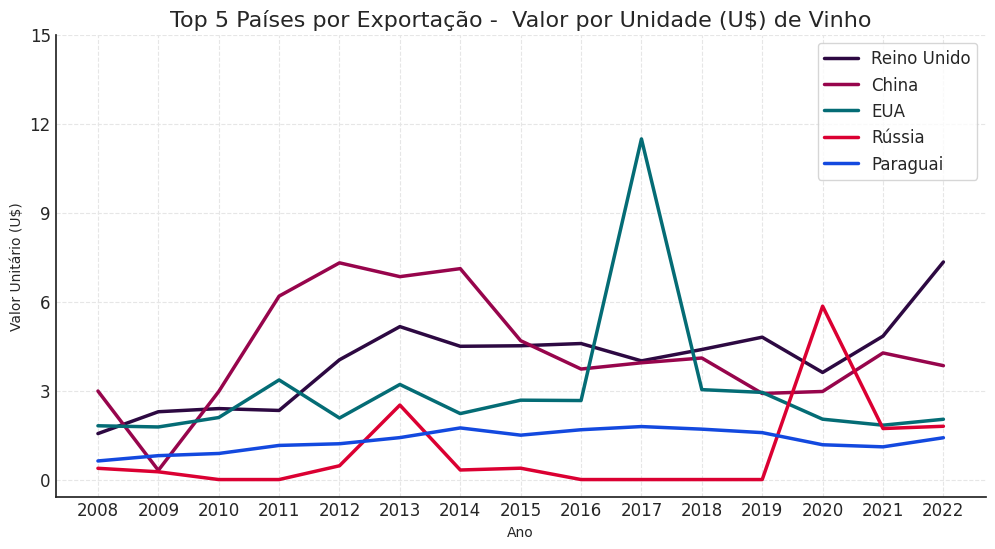

In [29]:
# plotar valor por litro os 5 países com maior valor exportado em dólar

# top 5 countries by total dolar value
vinho_top_5_dolars = vinho_dolars_sum.sort_values(by='dolars', ascending=False).head(5).copy()
# get only top 5 countries from vinho_exp_value
vinho_exp_value_top_5 = vinho_exp_value.loc[vinho_top_5_dolars.index].copy()
# estados unidos da américa -> eua
vinho_exp_value_top_5.index = vinho_exp_value_top_5.index.map(lambda x: 'EUA' if x == 'Estados Unidos da América' else x)

# plot top 5 countries by total dolar value
plot_top_countries_year(vinho_exp_value_top_5)

Para entender a estabilidade das negociações, calculamos a variância do dólar por litro ($u$).

Note que o desvio padrão, raiz quadrada da variância, também é uma métrica válida. Nesse caso, como os dados explorados sobre o dólar (mais à frente) são contemplados por variância, vamos manter o padrão.

In [30]:
# calcular variância de valor por unidade exportada por país
vinho_exp_value_var = pd.DataFrame(vinho_exp_value.var(axis=1).sort_values(ascending=False))
vinho_exp_value_var.columns = ['variance']
vinho_exp_value_var = vinho_exp_value_var.dropna()

vinho_exp_value_var.head()

,variance
country,
Panamá,216.732207
Serra Leoa,104.322242
Áustria,84.614265
Dinamarca,52.877215
Argentina,50.625748


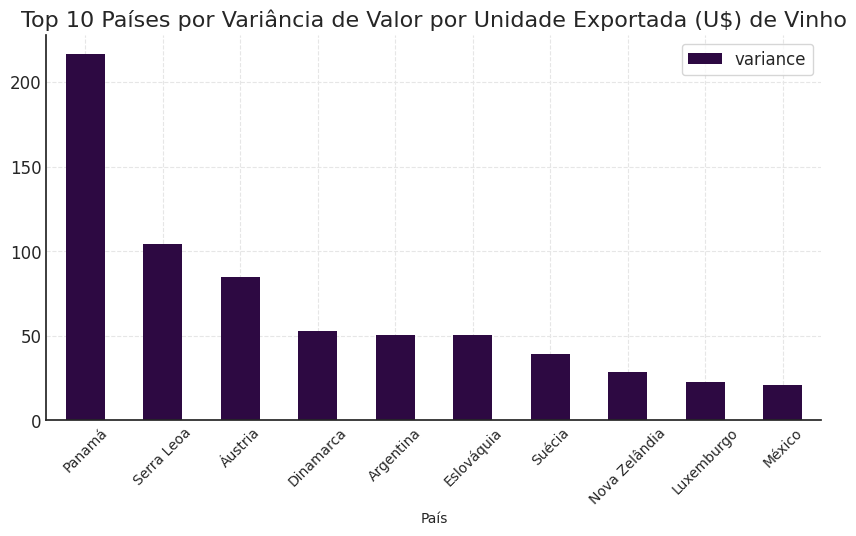

In [31]:
# países com maior variância de valor por unidade exportada
vinho_exp_value_var.head(10).plot(kind='bar', figsize=(10, 5))

plt.title('Top 10 Países por Variância de Valor por Unidade Exportada (U$) de Vinho', fontsize=16)
plt.xlabel('País')
plt.xticks(rotation=45, fontsize=10)
plt.show()

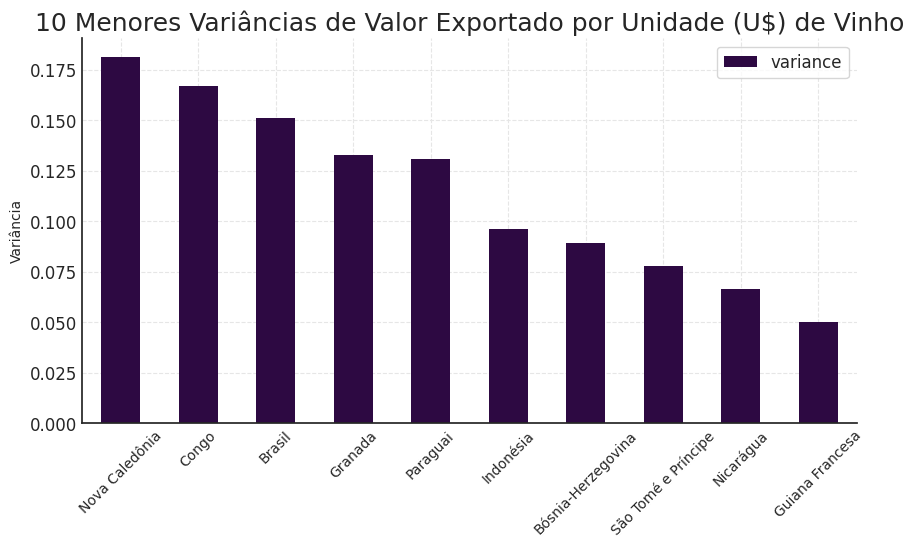

In [32]:
# países com menor variância de valor por unidade exportada
vinho_exp_value_var.tail(10).plot(kind='bar', figsize=(10, 5))
plt.title('10 Menores Variâncias de Valor Exportado por Unidade (U$) de Vinho', fontsize=18)
plt.xlabel('')
plt.ylabel('Variância')
plt.xticks(rotation=45, fontsize=10)
plt.show()

# Paraguai é mais estável que vendas dentro do território nacional

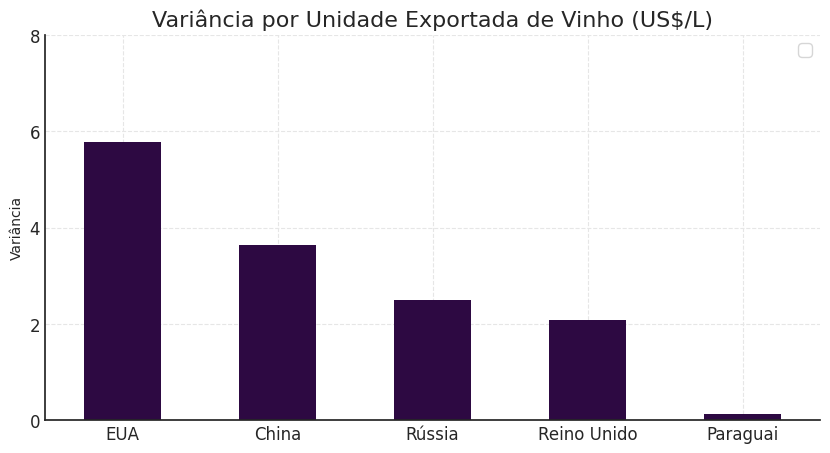

In [33]:
# plotar variância de vinho_top_5_dolars (países que mais exportaram)
vinho_top_5_dolars_var = pd.DataFrame(vinho_exp_value_var.loc[vinho_top_5_dolars.index].copy())
vinho_top_5_dolars_var.columns = ['variance']
# estados unidos da américa -> EUA
vinho_top_5_dolars_var.index = vinho_top_5_dolars_var.index.map(lambda x: 'EUA' if x == 'Estados Unidos da América' else x)
vinho_top_5_dolars_var = vinho_top_5_dolars_var.sort_values(by='variance', ascending=False)

vinho_top_5_dolars_var.plot(kind='bar', figsize=(10, 5))
plt.title('Variância por Unidade Exportada de Vinho (US$/L)', fontsize=16)
# rotate x ticks
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Variância')
plt.yticks(np.arange(0, 9, 2))
# drop legend
plt.legend('')
plt.show()

# Paraguai tem a menor variância de valor por unidade exportada, ou seja, tem o valor mais estável
# a variância está calculada em relação ao valor por unidade exportada em dólares por Litro

## Vinho x Outros Produtos - Vinícola 32

In [34]:
vinho_exp_sum = transform_quantity_dolar(vinho_exp_df, 'vinho')
vinho_exp_sum = dolar_per_quantity(vinho_exp_sum, 'vinho')

espumante_exp_sum = transform_quantity_dolar(espumante_exp_df, 'espumante')
espumante_exp_sum = dolar_per_quantity(espumante_exp_sum, 'espumante')

suco_exp_sum = transform_quantity_dolar(suco_exp_df, 'suco')
suco_exp_sum = dolar_per_quantity(suco_exp_sum, 'suco')

uva_exp_sum = transform_quantity_dolar(uva_exp_df, 'uva')
uva_exp_sum = dolar_per_quantity(uva_exp_sum, 'uva')

exp_sum_dfs = [vinho_exp_sum, espumante_exp_sum, suco_exp_sum, uva_exp_sum]

# mesclar
produtos_exp_df = pd.concat(exp_sum_dfs, axis=1)

In [35]:
exp_dolars_per_quantity = produtos_exp_df.copy()
exp_dolars_per_quantity_cols = exp_dolars_per_quantity.columns.str.contains('dolar_per_quantity')
exp_dolars_per_quantity = exp_dolars_per_quantity.loc[:, exp_dolars_per_quantity_cols].copy()
exp_dolars_per_quantity.columns = ['vinho', 'espumante', 'suco', 'uva']

exp_dolars_per_quantity.head()

,vinho,espumante,suco,uva
2008,0.688,1.545,2.291,2.085
2009,0.350,3.851,2.154,2.027
2010,2.027,2.830,2.598,2.247
2011,2.976,5.080,3.535,2.286
2012,0.956,4.709,3.121,2.343


In [36]:
# representatividade
rep_produtos = produtos_exp_df[['vinho_dolars', 'espumante_dolars', 'suco_dolars', 'uva_dolars']].copy()
rep_produtos = rep_produtos.sum(axis=0)
rep_produtos = pd.DataFrame(rep_produtos)
rep_produtos.columns = ['Valor (US$)']
rep_produtos['Share (%)'] = (rep_produtos['Valor (US$)'] / rep_produtos['Valor (US$)'].sum() * 100).round(1)
rep_produtos = rep_produtos.sort_values(by='Share (%)', ascending=False)
rep_produtos.index = rep_produtos.index.str.replace('_dolars', '')

#exportar
#rep_produtos.to_excel('outputs/representatividade_produtos.xlsx')

rep_produtos.head()

,Valor (US$),Share (%)
uva,1643894511,86.3
suco,128302378,6.7
vinho,112644316,5.9
espumante,19598200,1.0


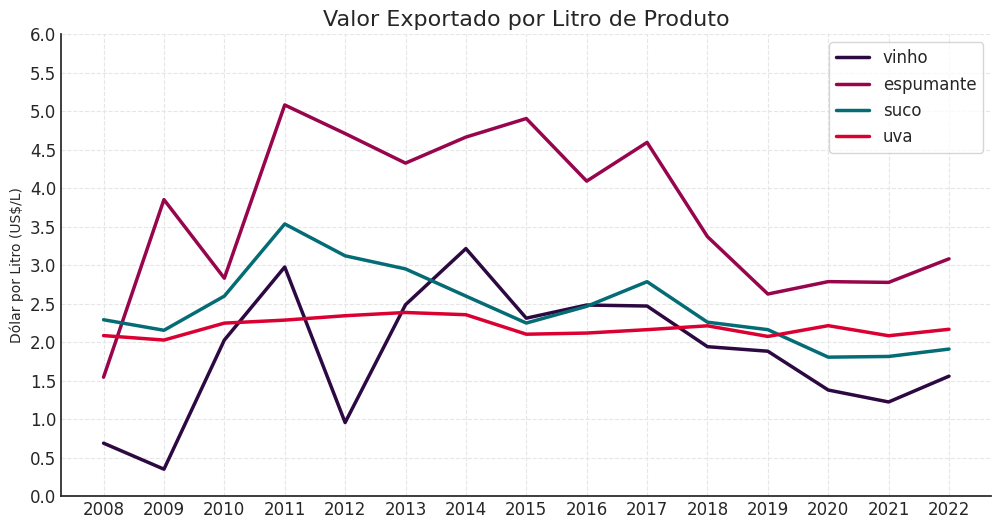

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=exp_dolars_per_quantity, ax=ax, linewidth=2.5, dashes=False)
plt.title('Valor Exportado por Litro de Produto', fontsize=16)
plt.ylabel('Dólar por Litro (US$/L)')
plt.ylim(0, 6)
plt.xticks(np.arange(2008, 2023, 1))
plt.yticks(np.arange(0, 6.5, 0.5))
plt.show()

In [38]:
exp_dolars_total = produtos_exp_df.copy()
exp_dolars_total_cols = exp_dolars_total.columns.str.contains('_dolars')
exp_dolars_total = exp_dolars_total.loc[:, exp_dolars_total_cols].copy()
exp_dolars_total.columns = ['vinho', 'espumante', 'suco', 'uva']

exp_dolars_total.head()

,vinho,espumante,suco,uva
2008,7118100,548650,15174072,171456124
2009,8940988,346551,12621332,110574457
2010,2595303,1095632,8048125,136648806
2011,3615120,568390,15737683,135782857
2012,5521293,813909,7719833,121898272


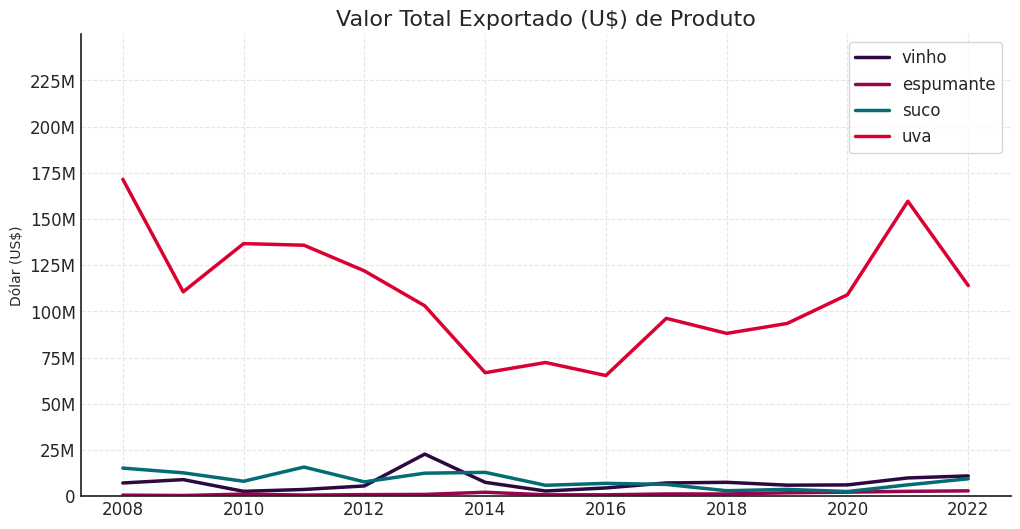

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=exp_dolars_total, ax=ax, linewidth=2.5, dashes=False)
plt.title('Valor Total Exportado (U$) de Produto', fontsize=16)
plt.xlabel('')
plt.ylabel('Dólar (US$)')
plt.ylim(0, 250000000)
plt.yticks(np.arange(0, 250000000, 25000000), ['0', '25M', '50M', '75M', '100M', '125M', '150M', '175M', '200M', '225M'])
plt.show()

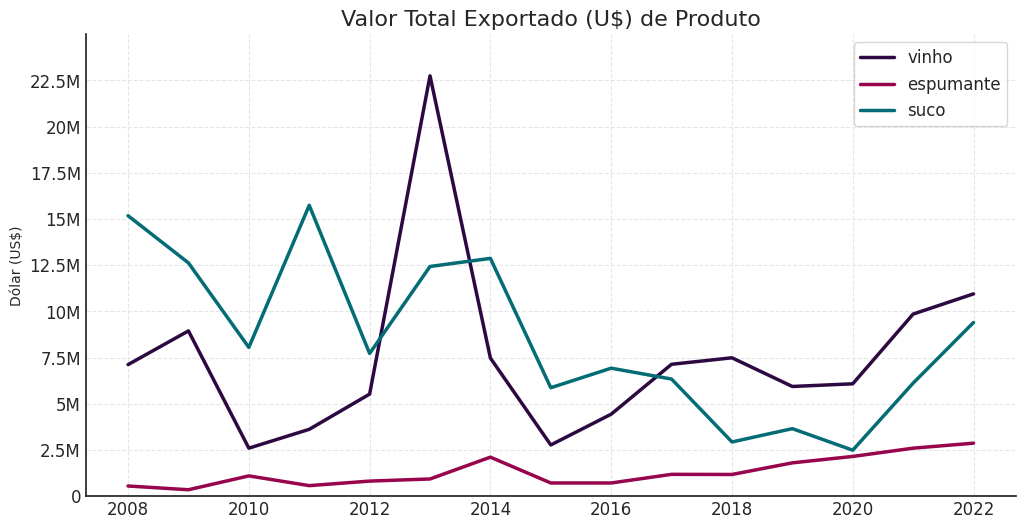

In [40]:
# plotar sem 'uva' para melhor visualização
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=exp_dolars_total.iloc[:, :-1], ax=ax, linewidth=2.5, dashes=False)
plt.title('Valor Total Exportado (U$) de Produto', fontsize=16)
plt.xlabel('')
plt.ylabel('Dólar (US$)')
plt.ylim(0, 25000000)
plt.yticks(np.arange(0, 25000000, 2500000), ['0', '2.5M', '5M', '7.5M', '10M', '12.5M', '15M', '17.5M', '20M', '22.5M'])
plt.show()

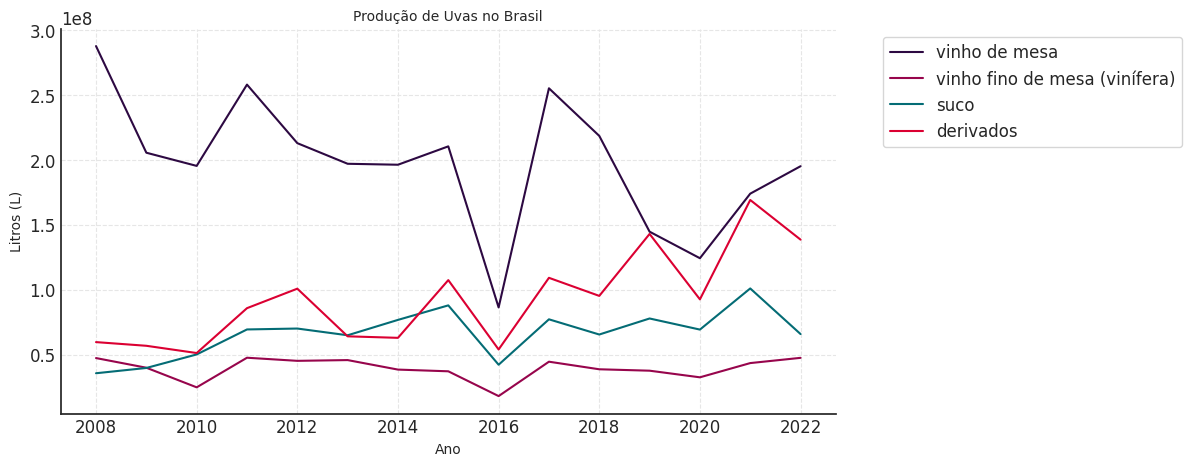

In [41]:
producao.T.plot(figsize=(10, 5))
plt.title('Produção de Uvas no Brasil')
plt.ylabel('Litros (L)')
plt.xlabel('Ano')
# legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# as uvas do vinho de mesa são mais produzidas no Brasil que as uvas para vinho fino -> clima

Agora, um gráfico animado com a biblioteca `plotly` para comparar a exportação de vinho com outros produtos da vinícola, ao longo do tempo.

In [42]:
# filtrar apenas dólares
vinho_anim = vinho_exp_df.loc[:, ~vinho_exp_df.columns.str.contains('_quantity')].copy()
espumante_anim = espumante_exp_df.loc[:, ~espumante_exp_df.columns.str.contains('_quantity')].copy()
suco_anim = suco_exp_df.loc[:, ~suco_exp_df.columns.str.contains('_quantity')].copy()
uva_anim = uva_exp_df.loc[:, ~uva_exp_df.columns.str.contains('_quantity')].copy()

# adicionar coluna do produto
vinho_anim['product'] = 'vinho'
espumante_anim['product'] = 'espumante'
suco_anim['product'] = 'suco'
uva_anim['product'] = 'uva'

anim_dfs = [vinho_anim, espumante_anim, suco_anim, uva_anim]

vinho_anim.head()

,2008_dolars,2009_dolars,2010_dolars,2011_dolars,2012_dolars,2013_dolars,2014_dolars,2015_dolars,2016_dolars,2017_dolars,2018_dolars,2019_dolars,2020_dolars,2021_dolars,2022_dolars,product
country,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,vinho
Alemanha,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,vinho
Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,vinho
Antilhas Holandesas,22908,10651,12808,10188,14081,19565,7169,10545,26450,8550,0,0,0,0,0,vinho
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,191,1549,1864,2268,1866,vinho


In [43]:
# preparar dados para plotagem
for df in anim_dfs:
    df.columns = df.columns.str.replace('_dolars', '')

# concatenar em único df
anim_df = pd.concat(anim_dfs, axis=0).reset_index(drop=False)
# agregar soma dos produtos
anim_df = anim_df.groupby('product').sum()

anim_df = anim_df.drop('country', axis=1)
anim_df['total'] = anim_df.sum(axis=1)
anim_df = anim_df.sort_values(by='total', ascending=False).T
anim_df = anim_df.drop('total', axis=0)

anim_df.index.name = 'year'
# melt df
anim_df = anim_df.reset_index().melt(id_vars='year', var_name='product', value_name='dolars')
# drop 0 values
anim_df = anim_df.query('dolars > 0').copy()
# reset index
anim_df = anim_df.reset_index(drop=True)

anim_df.head()

,year,product,dolars
0,2008,uva,171456124
1,2009,uva,110574457
2,2010,uva,136648806
3,2011,uva,135782857
4,2012,uva,121898272


In [44]:
fig = px.bar(anim_df, x="product", y="dolars", color="product", 
                animation_frame="year", animation_group="product", 
                range_y=[anim_df.dolars.min(), anim_df.dolars.max()], 
                color_discrete_sequence=['#540085', '#1349DF', '#97054C', '#046C75'],
                template='plotly_dark', title='Valor Total Exportado (U$) por Produto', 
                labels={'product': '', 'dolars': 'Valor (U$)', 'year': 'Ano'},
                width=800, height=600)
# faster animateion
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 60


fig.show()

In [45]:
accumulated_df = anim_df.copy()
# get accumulated sum by product
accumulated_df['dolars'] = accumulated_df.groupby('product')['dolars'].cumsum()
# drop uva
accumulated_df = accumulated_df.query('product != "uva"').copy()
# plot
fig = px.bar(accumulated_df, x="product", y="dolars", color="product",
                animation_frame="year", animation_group="product",
                range_y=[accumulated_df.dolars.min(), accumulated_df.dolars.max()],
                color_discrete_sequence=['#1349DF', '#97054C', '#046C75'],
                template='plotly_dark', title='Valor Total Exportado (U$) - Soma Acumulada por Produto',
                labels={'product': '', 'dolars': 'Valor (U$)', 'year': 'Ano'},
                width=800, height=600)
# faster animateion
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 80
# save chart animation
#fig.write_html("outputs/exportacao_acumulado.html")
fig.write_html("outputs/exportacao_acumulado.html", include_plotlyjs="cdn", include_mathjax="cdn")
fig.show()

# Dados Externos

In [46]:
# caminho relativo
external_path = 'dados_externos/'

## Comex - Comércio Exterior

"O valor FOB US$ indica o preço da mercadoria em dólares americanos sob o Incoterm FOB (Free on Board), modalidade na qual o vendedor é responsável por embarcar a mercadoria enquanto o comprador assume o pagamento do frete, seguros e demais custos pós-embarque. Nesse caso, o valor informado da mercadoria expressa o valor exclusivamente da mercadoria. Cabe ressaltar que os valores em dólares são os informados nos documentos de exportações e importações, sem qualquer cálculo ou correção em relação a um período de referência ou índice de preços."

(Fonte: [Governo Brasileiro -  Comex](http://comexstat.mdic.gov.br/pt/faq))

In [47]:
filter_cols_gov = ['CO_ANO', 'KG_LIQUIDO', 'VL_FOB']
rename_cols_gov = ['qty_kg', 'val_dolar']

export_gov_df = pd.read_csv(external_path + 'exp_totais_comex.csv', sep=';', encoding='latin-1', usecols=filter_cols_gov, index_col=0)
import_gov_df = pd.read_csv(external_path + 'imp_totais_comex.csv', sep=';', encoding='latin-1', usecols=filter_cols_gov, index_col=0)

export_gov_df.index.name = 'year'
export_gov_df.columns = rename_cols_gov

import_gov_df.index.name = 'year'
import_gov_df.columns = rename_cols_gov

# filtrar anos 2008 - 2022
export_gov_df = export_gov_df.loc[2008:2022].copy()
import_gov_df = import_gov_df.loc[2008:2022].copy()

print(f'Exportação: {export_gov_df.shape}\nImportação: {import_gov_df.shape}')

Exportação: (15, 2)
Importação: (15, 2)


In [48]:
# coluna para dolar por kg (1Lg=1L)
export_gov_df['dolar_per_kg'] = (export_gov_df['val_dolar'] / export_gov_df['qty_kg']).round(3)
import_gov_df['dolar_per_kg'] = (import_gov_df['val_dolar'] / import_gov_df['qty_kg']).round(3)

# mesclar dados de exportação e importação
gov_df = pd.concat([export_gov_df, import_gov_df], axis=1)
gov_df.columns = ['export_qty_kg', 'export_val_dolar', 'export_dolar_per_kg', 'import_qty_kg', 'import_val_dolar', 'import_dolar_per_kg']

gov_df.head()

,export_qty_kg,export_val_dolar,export_dolar_per_kg,import_qty_kg,import_val_dolar,import_dolar_per_kg
year,,,,,,
2008,468761411307,195764624177,0.418,124495090563,174707087626,1.403
2009,455255567414,151791674186,0.333,103914791481,129397611523,1.245
2010,519741427910,200434134826,0.386,138111464460,183336964846,1.327
2011,544085651715,253666309507,0.466,148702935502,227969756701,1.533
2012,545932339242,239952538158,0.440,141788957040,225166426069,1.588


In [49]:
export_gov_df.head()

,qty_kg,val_dolar,dolar_per_kg
year,,,
2008,468761411307,195764624177,0.418
2009,455255567414,151791674186,0.333
2010,519741427910,200434134826,0.386
2011,544085651715,253666309507,0.466
2012,545932339242,239952538158,0.440


In [50]:
# apenas dados em dólar
val_gov_df = gov_df.loc[:, gov_df.columns.str.contains('val_dolar')].copy()
val_gov_df.columns = ['export_val_dolar', 'import_val_dolar']

val_gov_df.head()

,export_val_dolar,import_val_dolar
year,,
2008,195764624177,174707087626
2009,151791674186,129397611523
2010,200434134826,183336964846
2011,253666309507,227969756701
2012,239952538158,225166426069


In [51]:
# cruzar datasets - Exportação no Brasil & Exportação da Vinícola
exp_dolars_total['dolars_total'] = exp_dolars_total.sum(axis=1)

# put total column from dolars_total to val_gov_df
val_gov_df['dolars_total'] = exp_dolars_total['dolars_total'].copy()

val_gov_df.columns = ['export_br', 'import_br', 'export_winery']

val_gov_df.head()

,export_br,import_br,export_winery
year,,,
2008,195764624177,174707087626,194296946
2009,151791674186,129397611523,132483328
2010,200434134826,183336964846,148387866
2011,253666309507,227969756701,155704050
2012,239952538158,225166426069,135953307


In [52]:
norm_export = val_gov_df.copy()
# drop import_br and norm with log for 0-1 range
norm_export = norm_export.drop('import_br', axis=1)
norm_export['export_br'] = np.log(norm_export['export_br'])
norm_export['export_winery'] = np.log(norm_export['export_winery'])
# normalize
norm_export = (norm_export - norm_export.min()) / (norm_export.max() - norm_export.min())

norm_export.head(10)

,export_br,export_winery
year,,
2008,0.322423,1.000000
2009,0.000000,0.584383
2010,0.352298,0.707433
2011,0.650805,0.759669
2012,0.580367,0.612445
2013,0.540621,0.637247
2014,0.475650,0.155515
2015,0.262896,0.059121
2016,0.212679,0.000000


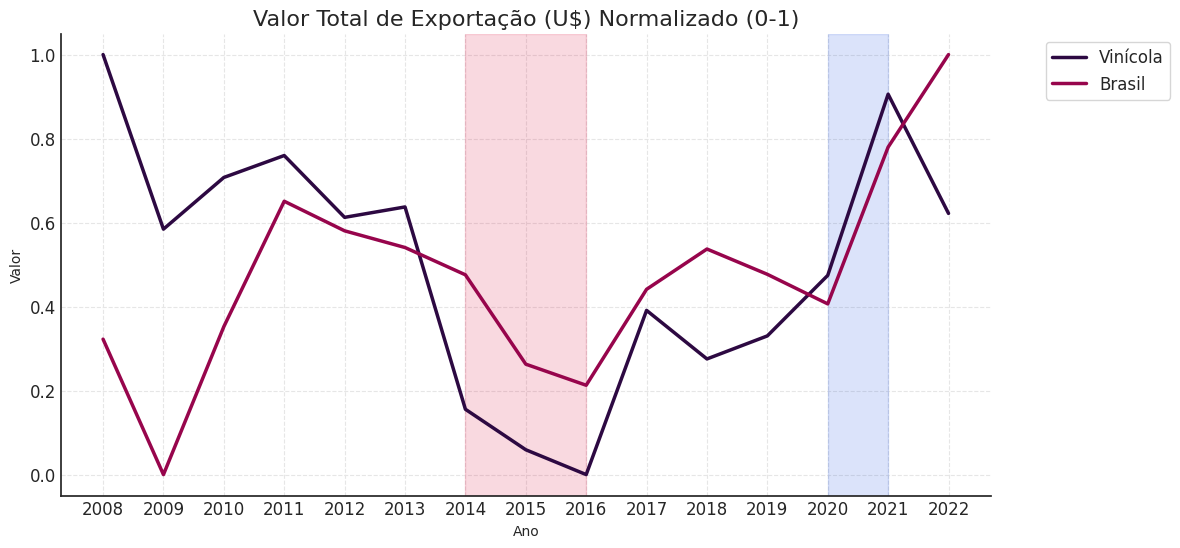

In [53]:
norm_export.columns = ['Brasil', 'Vinícola']
# invert column order
norm_export = norm_export.iloc[:, ::-1]

fig, ax = plt.subplots(figsize=(12, 6))
# plot all years
sns.lineplot(data=norm_export, ax=ax, linewidth=2.5, dashes=False)
# title
plt.title('Valor Total de Exportação (U$) Normalizado (0-1)', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Valor')
# all years in x
plt.xticks(norm_export.index)
# legend outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# red in 2014-16
ax.axvspan(2014, 2016, color='#DB0032', alpha=0.15)
# green in 2020-21
ax.axvspan(2020, 2021, color='#1349DF', alpha=0.15)
plt.show()

Alguns fatos históricos dos períodos acima podem ser levantados:

- 2014: Lava Jato, impeachment
- 2018: estudar cenário interno da vinícula, já que foi indiretamente proporcional ao Brasil (desceu enquanto Brasil subiu)
- 2020: pandemia

## Dólar x Real - Banco Central

In [54]:
dolar = currency.get('USD',
                    start='2008-01-01',
                    end='2022-12-31',
                    side='ask')

In [55]:
dolar.index = pd.to_datetime(dolar.index)
dolar['year'] = dolar.index.year
dolar = dolar.reset_index(drop=True)

# agregar
dolar = dolar.groupby('year').agg(['min', 'max', 'mean', 'var', 'last', 'first'])
# dropar multi index
dolar.columns = ['min', 'max', 'mean', 'var', 'last', 'first']

# exportar
#dolar.to_csv('dolar.csv')

dolar.head()

,min,max,mean,var,last,first
year,,,,,,
2008,1.5593,2.5004,1.837467,0.075334,2.3370,1.7722
2009,1.7024,2.4218,1.993549,0.051262,1.7412,2.3298
2010,1.6554,1.8811,1.759307,0.002716,1.6662,1.7240
2011,1.5345,1.9016,1.674634,0.009001,1.8758,1.6510
2012,1.7024,2.1121,1.954992,0.015227,2.0435,1.8683


In [56]:
# mesclar dados do governo (comex), do banco central e da vinícola
export_dolars_df = pd.concat([val_gov_df, dolar], axis=1).copy()
# dropar colunas desnecessárias
export_dolars_df = export_dolars_df.drop(['import_br', 'first', 'last'], axis=1)
# renomear colunas
export_dolars_df.columns = ['export_br', 'export_winery', 'dolar_min', 'dolar_max', 'dolar_mean', 'dolar_variance']
# calcular export_br variation usando shift
export_dolars_df['export_br_var'] = (export_dolars_df['export_br'] / export_dolars_df['export_br'].shift(1) - 1).round(3)
# calcular export_winery variation
export_dolars_df['export_winery_var'] = (export_dolars_df['export_winery'] / export_dolars_df['export_winery'].shift(1) - 1).round(3)
# calcular dolar_mean variation
export_dolars_df['dolar_mean_var'] = (export_dolars_df['dolar_mean'] / export_dolars_df['dolar_mean'].shift(1) - 1).round(3)
# nan para 0
export_dolars_df = export_dolars_df.fillna(0)
# dividir export_br, winery por 1e6
export_dolars_df['export_br_billion'] = (export_dolars_df['export_br'] / 1e9).round(3)
export_dolars_df['export_winery_million'] = (export_dolars_df['export_winery'] / 1e6).round(3)

# % * 100
export_dolars_df['dolar_mean_var'] = (export_dolars_df['dolar_mean_var'] * 100).round(2)
export_dolars_df['export_br_var'] = (export_dolars_df['export_br_var'] * 100).round(2)
export_dolars_df['export_winery_var'] = (export_dolars_df['export_winery_var'] * 100).round(2)

# exportar csv
#export_dolars_df.to_csv('export_dolars.csv')
export_dolars_df.head()

,export_br,export_winery,dolar_min,dolar_max,dolar_mean,dolar_variance,export_br_var,export_winery_var,dolar_mean_var,export_br_billion,export_winery_million
year,,,,,,,,,,,
2008,195764624177,194296946,1.5593,2.5004,1.837467,0.075334,0.0,0.0,0.0,195.765,194.297
2009,151791674186,132483328,1.7024,2.4218,1.993549,0.051262,-22.5,-31.8,8.5,151.792,132.483
2010,200434134826,148387866,1.6554,1.8811,1.759307,0.002716,32.0,12.0,-11.7,200.434,148.388
2011,253666309507,155704050,1.5345,1.9016,1.674634,0.009001,26.6,4.9,-4.8,253.666,155.704
2012,239952538158,135953307,1.7024,2.1121,1.954992,0.015227,-5.4,-12.7,16.7,239.953,135.953


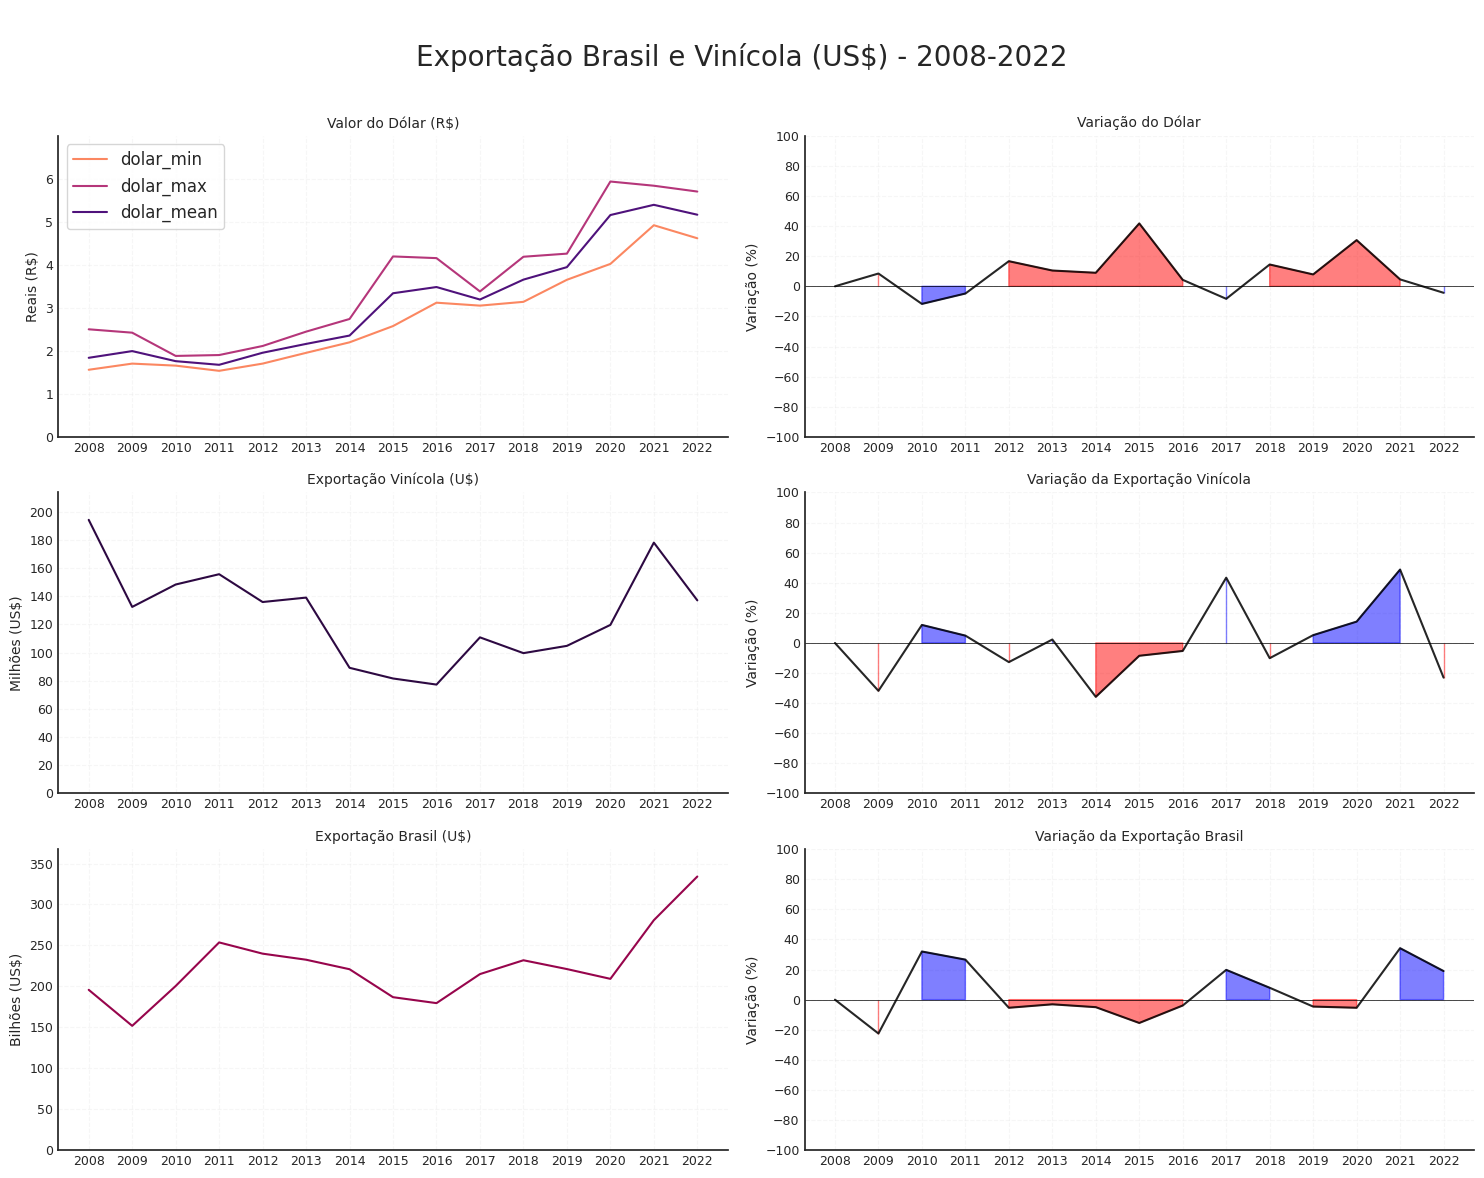

In [57]:
# plotar 6 gráficos
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
# dolar min, max, mean
sns.lineplot(data=export_dolars_df[['dolar_min', 'dolar_max', 'dolar_mean']], ax=ax[0, 0], linewidth=1.5, dashes=False, palette='magma_r')
# dolar var
sns.lineplot(data=export_dolars_df['dolar_mean_var'], ax=ax[0, 1], linewidth=1.5, dashes=False, color='k', alpha=0.85)
# export_winery
sns.lineplot(data=export_dolars_df['export_winery_million'], ax=ax[1, 0], linewidth=1.5, dashes=False, color='#2D0942')
# export_winery_var
sns.lineplot(data=export_dolars_df['export_winery_var'], ax=ax[1, 1], linewidth=1.5, dashes=False, color='k', alpha=0.85)
# export_br
sns.lineplot(data=export_dolars_df['export_br_billion'], ax=ax[2, 0], linewidth=1.5, dashes=False, color='#97054C')
# export_br_var
sns.lineplot(data=export_dolars_df['export_br_var'], ax=ax[2, 1], linewidth=1.5, dashes=False, color='k', alpha=0.85)
# título geral
plt.suptitle('\nExportação Brasil e Vinícola (US$) - 2008-2022\n', fontsize=20, fontweight='regular')
# títulos individuais
ax[0, 0].set_title('Valor do Dólar (R$)')
ax[0, 1].set_title('Variação do Dólar')
ax[1, 0].set_title('Exportação Vinícola (U$)')
ax[1, 1].set_title('Variação da Exportação Vinícola')
ax[2, 0].set_title('Exportação Brasil (U$)')
ax[2, 1].set_title('Variação da Exportação Brasil')
# formatar eixo y e legenda para dólar
ax[0, 0].set_ylim(0, 7)
ax[0, 0].set_yticks(np.arange(0, 7, 1))
ax[0, 0].set_ylabel('Reais (R$)')
ax[0, 0].legend(loc='upper left')
# formatar eixo y para dolar_mean_var
ax[0, 1].set_ylim(-80, 80)
ax[0, 1].set_yticks(np.arange(-100, 110, 20))
# adicionar linha em 0
ax[0, 1].axhline(0, color='black', linewidth=0.5)
ax[0, 1].set_ylabel('Variação (%)')
# formatar eixo y para export_winery
ax[1, 0].set_ylim(0, export_dolars_df['export_winery_million'].max() * 1.1)
ax[1, 0].set_yticks(np.arange(0, export_dolars_df['export_winery_million'].max() * 1.1, 20))
ax[1, 0].set_ylabel('Milhões (US$)')
# formatar eixo y para export_winery_var
ax[1, 1].set_ylim(-80, 80)
ax[1, 1].set_yticks(np.arange(-100, 110, 20))
# adicionar linha em 0
ax[1, 1].axhline(0, color='black', linewidth=0.5)
ax[1, 1].set_ylabel('Variação (%)')
# formatar eixo y para export_br
ax[2, 0].set_ylim(0, export_dolars_df['export_br_billion'].max() * 1.1)
ax[2, 0].set_yticks(np.arange(0, export_dolars_df['export_br_billion'].max() * 1.1, 50))
# formatar eixo y para export_br_var
ax[2, 0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[2, 0].set_ylabel('Bilhões (US$)')
# formatar eixo y para export_br_var
ax[2, 1].set_ylim(-80, 80)
ax[2, 1].set_yticks(np.arange(-100, 110, 20))
# adicionar linha em 0
ax[2, 1].axhline(0, color='black', linewidth=0.5)
ax[2, 1].set_ylabel('Variação (%)')

# plotar azul quando > 0 e vermelho quando < 0
var_plots = [ax[1, 1], ax[2, 1]]
for plot in var_plots:
    x = plot.lines[0].get_xdata()
    y = plot.lines[0].get_ydata()
    # preencher entre 0 e y
    plot.fill_between(x, 0, y, where=(y > 0), color='blue', alpha=0.50)
    plot.fill_between(x, 0, y, where=(y < 0), color='red', alpha=0.50)
# o oposto para dólar,
# plotar vermelho quando > 0 e azul quando < 0
dolar_plot = ax[0, 1]
x = dolar_plot.lines[0].get_xdata()
y = dolar_plot.lines[0].get_ydata()
dolar_plot.fill_between(x, 0, y, where=(y > 0), color='red', alpha=0.50)
dolar_plot.fill_between(x, 0, y, where=(y < 0), color='blue', alpha=0.50)
for ax in ax.flat:
    # eixo x de 1 em 1 ano
    ax.set_xticks(dolar.index)
    # tamanho da fonte
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    # grid
    ax.grid(alpha=0.35)
    ax.set_xlabel('')
    
plt.tight_layout()

# exportar
#plt.savefig('./outputs/export_dolars.png', dpi=300)

plt.show()

## OIV - Organização Internacional da Vinha e do Vinho

[**OIV - Organização Internacional da Vinha e do Vinho**](https://www.oiv.int/en)<br>

Database: https://www.oiv.int/what-we-do/data-discovery-report?oiv

In [58]:
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    oiv_df = pd.read_excel(external_path + 'oiv.xlsx', sheet_name='Export', engine='openpyxl')
    
oiv_df.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Dried Grapes,Consumption,1995.0,tonnes,8050.0
1,Asia,Afghanistan,Table Grapes,Consumption,1995.0,tonnes,189800.0
2,Asia,Afghanistan,Dried Grapes,Exports,1995.0,tonnes,20000.0
3,Asia,Afghanistan,Fresh Grapes,Exports,1995.0,tonnes,11500.0
4,Asia,Afghanistan,Fresh Grapes,Imports,1995.0,tonnes,0.0


In [59]:
oiv_df.columns = oiv_df.columns.str.lower()
oiv_df.columns = oiv_df.columns.str.replace(' ', '_')
oiv_df.columns = oiv_df.columns.str.replace('/', '_')
# remover colunas desnecessárias
oiv_df = oiv_df[:-2]

# ano para int
oiv_df['year'] = oiv_df['year'].astype(int)

# quantidade como inteiro
#oiv_df['quantity'].apply(lambda x: x.is_integer()).value_counts()
oiv_df['quantity'] = oiv_df['quantity'].astype(int)

oiv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52795 entries, 0 to 52794
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   continent       52795 non-null  object
 1   region_country  52795 non-null  object
 2   product         52795 non-null  object
 3   variable        52795 non-null  object
 4   year            52795 non-null  int64 
 5   unit            52795 non-null  object
 6   quantity        52795 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.8+ MB


In [60]:
export_oiv = oiv_df.query('product == "Wine" and variable == "Exports" and quantity > 0 and year >= 2008 and year <= 2022').copy()
export_oiv = export_oiv.drop(columns=['product', 'variable'])

# anos para colunas
export_oiv = export_oiv.pivot(index='region_country', columns='year', values='quantity')

# ajuste de nulos, zeros e inf
export_oiv = export_oiv.dropna(axis=0, how='all')
export_oiv = export_oiv.fillna(0)
export_oiv = export_oiv.replace(np.inf, 0)

export_oiv['total'] = export_oiv.sum(axis=1)
# sort
export_oiv = export_oiv.sort_values(by='total', ascending=False)
# drop global
export_oiv = export_oiv.drop(index='Global')

# as type int
export_oiv = export_oiv.astype(int)

# hectolitro => 1 hl = 100 L
# unidade de medida da tabela -> 1 = 1000 hl

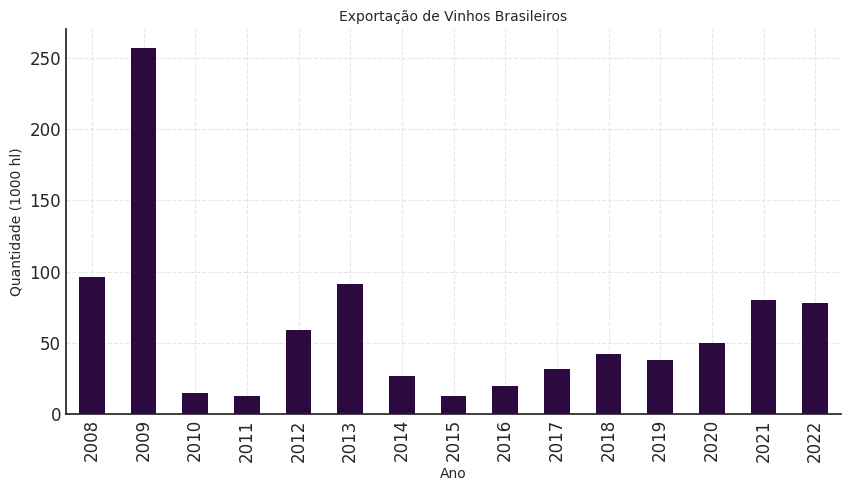

In [61]:
# locate Brasil in index
brazil_export = export_oiv.loc['Brazil'][:-1].copy()
# plot
brazil_export.plot(figsize=(10, 5), kind='bar')
plt.title('Exportação de Vinhos Brasileiros')
plt.ylabel('Quantidade (1000 hl)')
plt.xlabel('Ano')
plt.show()

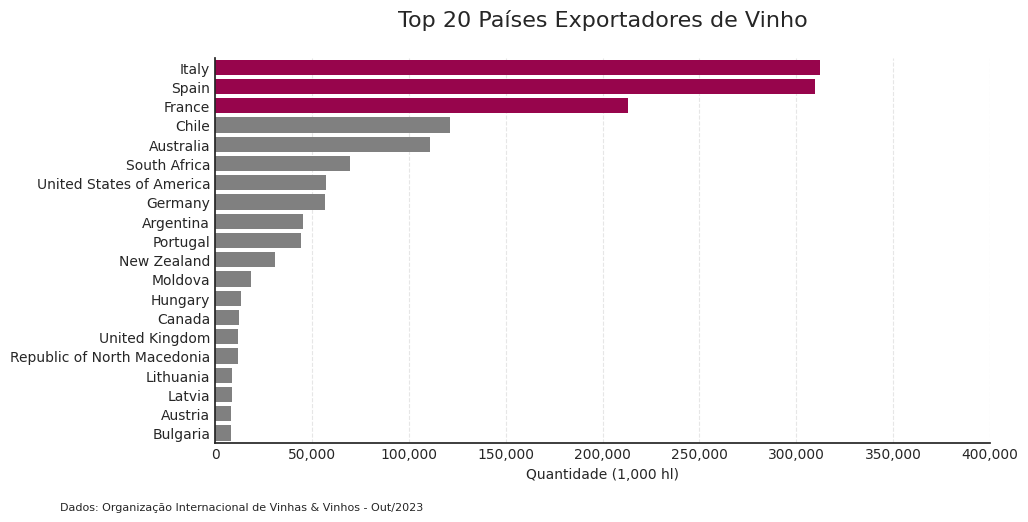

In [62]:
top_20_global_wine_exp = export_oiv['total'].sort_values(ascending=False)[0:20].copy()

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=top_20_global_wine_exp.values, y=top_20_global_wine_exp.index, color='gray')
ax.patches[0].set_facecolor('#97054C')
ax.patches[1].set_facecolor('#97054C')
ax.patches[2].set_facecolor('#97054C')
plt.xlim(0, 400000)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Top 20 Países Exportadores de Vinho\n', fontsize=16)
plt.text(-80000, 23, 'Dados: Organização Internacional de Vinhas & Vinhos - Out/2023', fontsize=8)
plt.ylabel('')
plt.xlabel('Quantidade (1,000 hl)')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Próximos passos:

- analisar sazonaliade de compras a partir de semanas e meses
- analisar compras individuais de cada país
- analisar a correlação entre o dólar e a quantidade de litros exportados (se houver)
- programar a rotina de atualização dos dados
- antecipar previsões a partir de fatos históricos em tempo real